# Import libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from unidecode import unidecode

# Import vocabulary

In [2]:
# Read json file vocabulary
with open('../data/vocabulary/test_vocabulary.json', 'r') as f:
    vocabulary = json.load(f)
# Show the first 3 keys
print(list(vocabulary.keys())[:3])
# Show the total elements of the vocabulary
print(len(vocabulary))

['administrativo', 'ingles', 'navision']
18020


# Sort vocabulary by the values

In [3]:
# Sort the vocabulary by the values
vocabulary = sorted(vocabulary.items(), key=lambda x: x[1], reverse=True)
# Show the first 3 keys
print(vocabulary[:3])

[('experiencia', 72580), ('trabajar', 69971), ('cliente', 69924)]


# Plot the actual vocabulary

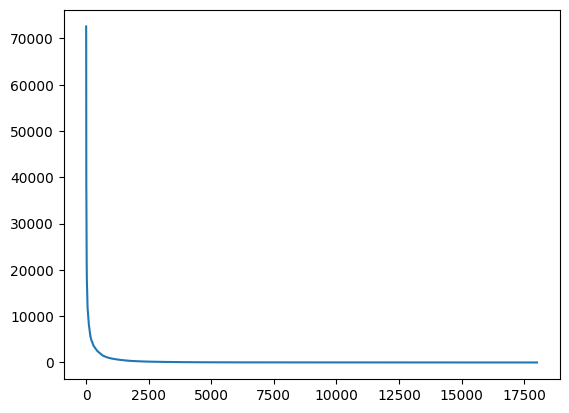

In [4]:
# Plot the values of the vocabulary
plt.plot([x[1] for x in vocabulary])

# Show the first 50

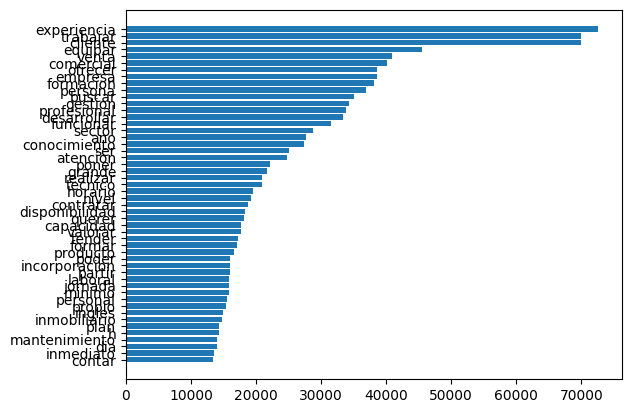

In [5]:
# Convert the dictionary items to a list of tuples, sorted by values in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Take the top 50 items
top_50_items = sorted_vocabulary[:50][::-1]

# Extract keys and values for plotting
keys = [x[0] for x in top_50_items]
values = [x[1] for x in top_50_items]

# Plot the top 50 values of the vocabulary in a bar plot, with keys on the y-axis and values on the x-axis
plt.barh(keys, values)
plt.show()


# Show the last 50

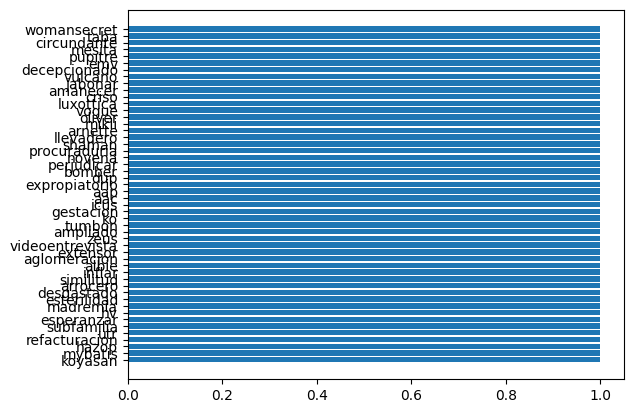

In [6]:
# Convert the dictionary items to a list of tuples, sorted by values in descending order
sorted_vocabulary = sorted(vocabulary, key=lambda x: x[1], reverse=True)

# Take the last 50 items
top_50_items = sorted_vocabulary[-50:][::-1]

# Extract keys and values for plotting
keys = [x[0] for x in top_50_items]
values = [x[1] for x in top_50_items]

# Plot the top 50 values of the vocabulary in a bar plot, with keys on the y-axis and values on the x-axis
plt.barh(keys, values)
plt.show()


# Statistics

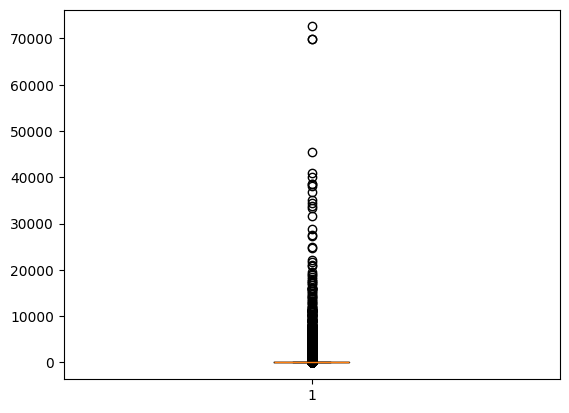

Media:  284.0617092119867
Desviación estándar:  1788.2125651023637
Percentiles:  [ 2.  8. 51.]


In [7]:
# Get the mean of the values of the vocabulary
mean = np.mean([x[1] for x in vocabulary])
# Get the standard deviation of the values of the vocabulary
std = np.std([x[1] for x in vocabulary])
# Get the values of the percentiles 25, 50 and 75 of the values of the vocabulary
percentiles = np.percentile([x[1] for x in vocabulary], [25, 50, 75])
# Print the values in a box plot
plt.boxplot([x[1] for x in vocabulary])
plt.show()
print("Media: ", mean)
print("Desviación estándar: ", std)
print("Percentiles: ", percentiles)

# Filter by count

New vocabulary:  4017


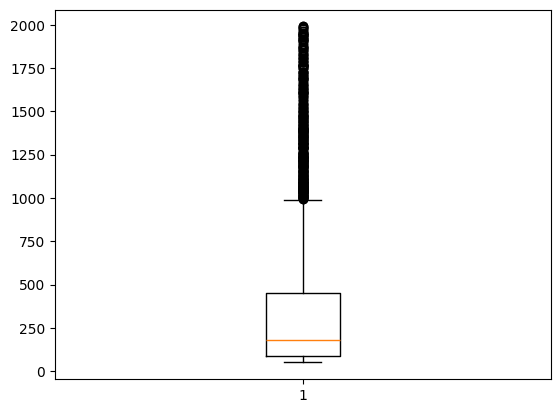

In [8]:
def filter_vocabulary(vocabulary, min_value, max_value):
    return [(k, v) for k, v in vocabulary if v >= min_value and v <= max_value]
new_vocabulary = filter_vocabulary(vocabulary, 50, 2000)
print("New vocabulary: ", len(new_vocabulary))
# Show the boxplot of the new vocabulary
plt.boxplot([x[1] for x in new_vocabulary])
# Save the new vocabulary in a json file as a dictionary
with open('../data/vocabulary/new_vocabulary.json', 'w') as f:
    json.dump(dict(new_vocabulary), f)

# Import data

In [9]:
# Read dataframe
df = pd.read_json("../data/test/test_palabras_nuevas.json")
df.head()

,ID_OFERTA,ID_PUESTO_ESCO_ULL,CATEGORIA,SUBCATEGORIA,PALABRAS_EMPLEO_TEXTO_NUEVAS
0,ef5a8ae0a743018628df9bd53893bb,1634,Administracion de empresas,Administracion,ADMINISTRATIVO INGLES NAVISION TURNAR EMPRESA ...
1,47137c06a640348ca4cb7dcbf938b1,611,Sanidad y salud,Medicina general,MEDICAR FUNCIONAR DESEMPENAR PROPIO PONER MEDI...
2,cdfb72672340819a6721db72eee187,2825,Comercial y ventas,Comercial,REPARTIDOR BUSCAR PERSONA PONER CHOFER REPARTI...
3,5746210e854264aaca9452f4d377a4,1984,Ventas al detalle,Venta al detalle,DEPENDIENTE ABRIR PROCESAR SELECCION DEPENDIEN...
4,8a1bda0c91438bb4133f32e392a1ce,1984,Ventas al detalle,Venta al detalle,DEPENDIENTE STRADIVARIUS CC PALMERO FUERTEVENT...


# Group by ID_PUESTO_ESCO_ULL

In [10]:
# Group by ID_PUESTO_ESCO_ULL and sum the PALABRAS_EMPLEO_TEXTO_NUEVAS column for each group
df_sum = df.groupby("ID_PUESTO_ESCO_ULL")["PALABRAS_EMPLEO_TEXTO_NUEVAS"].sum().reset_index()
# This will create a DataFrame with the sum of PALABRAS_EMPLEO_TEXTO_NUEVAS for each group
df_sum.head()

,ID_PUESTO_ESCO_ULL,PALABRAS_EMPLEO_TEXTO_NUEVAS
0,33,SECRETAR DIRECCION BUSCAR SECRETAR DIRECCION T...
1,39,DIRECTOR NUEVA AGENCIAR PREVENCION COMPANIA AM...
2,41,DIRECTOR GENERAL SELECCIONAR DIRECTOR GENERAL ...
3,42,DIRECTOR EJECUTIVO PALMAR CONSULTORIA ENERGETI...
4,44,DIRECTOR OPERACION FUNCIONAR EMPRESARIAL FAMIL...


# Create vocabulary by occupation

In [11]:
# Create vocabulary_df word:count in a dictionary for each group
vocabulary_df = {}
for index, row in df_sum.iterrows():
    vocabulary_ocupation = {}
    for word in row["PALABRAS_EMPLEO_TEXTO_NUEVAS"].split(" "):
        if word in vocabulary_ocupation:
            vocabulary_ocupation[word] += 1
        else:
            vocabulary_ocupation[word] = 1
    # Sort the vocabulary by the values
    vocabulary_ocupation = sorted(vocabulary_ocupation.items(), key=lambda x: x[1], reverse=True)
    vocabulary_df[row["ID_PUESTO_ESCO_ULL"]] = vocabulary_ocupation
# Show the first 3 keys
print(list(vocabulary_df.keys())[:3])

[33, 39, 41]


# Show plot for one occupation

In [12]:
occupation = 39
# Get the vocabulary of occupation 33
vocabulary_occupation = vocabulary_df[occupation]

# Get the common words for all occupations

In [42]:
# Array of all words, each item is a list of words (for each occupation)

def filter_vocabulary(vocabulary_df, min_value, max_value):
    all_words = []
    for occupation in vocabulary_df:
        for tuple_word_count in vocabulary_df[occupation]:
            word, count = tuple_word_count
            if count > min_value and word:
                all_words.append(word)
    print("Total words after filter by count occupation: ", len(all_words))
    all_words_vocab = {}
    for word in all_words:
        if word not in all_words_vocab.keys():
            all_words_vocab[word] = 1
        else:
            all_words_vocab[word] += 1
    new_words_vocab = {}
    for word in all_words_vocab.keys():
        if all_words_vocab[word] < max_value:
            new_words_vocab[word] = all_words_vocab[word]
    print("Total words after filter by count all: ", len(new_words_vocab))
    return new_words_vocab

def filter_important_words(vocabulary_df):
    # Create a set to store unique words from all occupations
    all_words = set()
    
    # Loop over occupations
    for occupation in vocabulary_df.keys():
        # Loop over words and counts in the current occupation
        for word, count in vocabulary_df[occupation]:
            # Add the word to the set of all words
            all_words.add(word)
    # Create a dictionary to store the count of each word across all occupations
    word_counts = {}
    # Loop over occupations again
    for occupation in vocabulary_df.keys():
        # Loop over words and counts in the current occupation
        for word, count in vocabulary_df[occupation]:
            # Check if the word exists in other occupations
            # If it does, increment the count in the word_counts dictionary
            if word in all_words:
                if word not in word_counts:
                    word_counts[word] = count
                else:
                    word_counts[word] += count
    return word_counts

def words_unique_to_occupation(vocabulary_df):
    unique_words_by_occupation = {}
    
    for occupation in vocabulary_df:
        unique_words = set()
        
        # Iterate through the words and counts for the current occupation
        for word, count in vocabulary_df[occupation]:
            # Check if the word appears in any other occupation
            word_in_other_occupations = False
            
            for other_occupation in vocabulary_df:
                if other_occupation != occupation:  # Skip the current occupation
                    for other_word, _ in vocabulary_df[other_occupation]:
                        if word == other_word:
                            word_in_other_occupations = True
                            break  # No need to check further
                
                if word_in_other_occupations:
                    break  # No need to check further
                
            if not word_in_other_occupations:
                unique_words.add(word)
        
        unique_words_by_occupation[occupation] = unique_words

    return unique_words_by_occupation

# min_value = 2
# max_value = 250
# new_words_vocab = filter_vocabulary(vocabulary_df, min_value, max_value)
# new_words_vocab_2 = filter_important_words(vocabulary_df)
new_words_vocab_2 = words_unique_to_occupation(vocabulary_df)
print("Total words after filter by count all: ", len(new_words_vocab_2))
# # Sort the word_counts dictionary by frequency in descending order
# sorted_word_counts = sorted(new_words_vocab.items(), key=lambda x: x[1], reverse=True)
# # Take the top 50 words
# top_50_words = sorted_word_counts[:50]
# # Separate the words and counts for plotting
# top_words, top_counts = zip(*top_50_words)
# # Create the bar plot
# plt.bar(range(len(top_words)), top_counts, color="green")
# plt.xlabel("Words")
# plt.ylabel("Frequency")
# plt.title("Top 50 Words by Frequency")
# plt.xticks(range(len(top_words)), top_words, rotation=90)  # Rotate the x-axis labels
# plt.tight_layout()  # Ensure the labels fit nicely
# plt.show()

In [ ]:
all_words_vocab

{'DIRECCION': 0,
 'GENERAL': 0,
 'EXPERIENCIA': 0,
 'CONOCIMIENTO': 0,
 'ADMINISTRACION': 0,
 'EMPRESA': 0,
 'COMPANIA': 0,
 'NIVEL': 0,
 'VALORAR': 0,
 'ESTABLECER': 0,
 'ESTRATEGICO': 0,
 'UNIVERSITARIO': 0,
 'CONSEJO': 0,
 'ESTRATEGIA': 0,
 'COMPROMISO': 0,
 'PLAN': 0,
 'PROCESO': 0,
 'AVANZAR': 0,
 'INGLES': 0,
 'SELECCIONAR': 0,
 'DIRECTOR': 0,
 'EXCELENTE': 0,
 'FUNCIONAR': 0,
 'LIDERAR': 0,
 'COMITE': 0,
 'COORDINAR': 0,
 'PRINCIPAL': 0,
 'OBJETIVO': 0,
 'OPTIMIZAR': 0,
 'ANUAL': 0,
 'CLIMA': 0,
 'LABORAL': 0,
 'PONER': 0,
 'PERSONA': 0,
 'MOTIVACION': 0,
 'GARANTIZAR': 0,
 'CUMPLIMIENTO': 0,
 'NORMATIVA': 0,
 'TITULACION': 0,
 'ESTUDIO': 0,
 'POSTGRADO': 0,
 'PUESTO': 0,
 'COMPETENCIA': 0,
 'COMUNICACION': 0,
 'VISION': 0,
 'CAPACIDAD': 0,
 'ANALISIS': 0,
 'TOMAR': 0,
 'DECISION': 0,
 'LIDERAZGO': 0,
 'TRABAJAR': 0,
 'EQUIPAR': 0,
 'NEGOCIACIONDIRECTOR': 0,
 'DESARROLLAR': 0,
 'MEJORAR': 0,
 'ANO': 0,
 'SECRETAR': 0,
 'OFFICE': 0,
 'CONSOLIDAR': 0,
 'EMPRESARIAL': 0,
 'PALMAR':